<a href="https://colab.research.google.com/github/utkar22/CSE508_Winter2023_A3_48/blob/main/IR_A3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Navigate to the folder IR_A3 on my drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IR_A3

Mounted at /content/drive
/content/drive/MyDrive/IR_A3


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('reddit.tsv', sep='\t')

In [4]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


Creating a list of all the subreddits

In [8]:
all_subs = []
for i in df["SOURCE_SUBREDDIT"]:
    if i not in all_subs:
        all_subs.append(i)

for i in df["TARGET_SUBREDDIT"]:
    if i not in all_subs:
        all_subs.append(i)

Mapping the name of the subreddit to the index in the array

In [10]:
sub_index = {}
for i in range(len(all_subs)):
    sub_index[all_subs[i]] = i

In [11]:
num_nodes = len(all_subs)

In [12]:
adj_matrix = []
for i in range(num_nodes):
    curr = []
    for j in range(num_nodes):
        curr.append(0)
    adj_matrix.append(curr)

edge_list = []

In [14]:
for index, row in df.iterrows():
    sub1 = row[0]
    sub2 = row[1]

    id1 = sub_index[sub1]
    id2 = sub_index[sub2]

    tup = (id1,id2)

    adj_matrix[id1][id2] = 1
    
    if tup not in edge_list:
        edge_list.append(tup)

The number of nodes in the graph

In [15]:
print(f"The number of nodes is: {num_nodes}")

The number of nodes is: 35776


The number of edges in the graph

In [16]:
num_edges = len(edge_list)
print(f"The number of edges is: {num_edges}")

The number of edges is: 137821


Average In-Degree: In a directed network, the in-degree of a node is the number of incoming edges to that node. The average in-degree of a network is the sum of in-degrees for all nodes divided by the total number of nodes in the network.

In [18]:
avg_in_degree = num_edges/num_nodes
print(f"The average in-degree is: {avg_in_degree}")

The average in-degree is: 3.8523311717352415


Average Out-Degree: In a directed network, the out-degree of a node is the number of outgoing edges from that node. The average out-degree of a network is the sum of out-degrees for all nodes divided by the total number of nodes in the network.

In [20]:
avg_out_degree = num_edges/num_nodes
print(f"The average out-degree is: {avg_out_degree}")

The average out-degree is: 3.8523311717352415


Node with Maximum In-Degree: In a directed network, the node with the maximum in-degree is the node that has the highest number of incoming edges.

In [21]:
max_in_degree = 0
max_in_degree_node = None

for j in range(num_nodes):
    curr_node = all_subs[j]
    curr_in_degree = 0
    for i in range(num_nodes):
        curr_in_degree+=adj_matrix[i][j]

    if (curr_in_degree>max_in_degree):
        max_in_degree = curr_in_degree
        max_in_degree_node = curr_node

print(f"The node with the maximum in degree is {max_in_degree_node} with an in degree of {max_in_degree}")

The node with the maximum in degree is askreddit with an in degree of 2161


Node with Maximum Out-Degree: In a directed network, the node with the maximum out-degree is the node that has the highest number of outgoing edges.

In [22]:
out_degree_dict = {}

max_out_degree = 0
max_out_degree_node = None

for i in range(num_nodes):
    curr_node = all_subs[i]
    curr_out_degree = sum(adj_matrix[i])

    if (curr_out_degree > max_out_degree):
        max_out_degree = curr_out_degree
        max_out_degree_node = curr_node

    if curr_out_degree not in out_degree_dict:
        out_degree_dict[curr_out_degree] = 0
    out_degree_dict[curr_out_degree]+=1

print(f"The Maximum Out-Degree is {max_out_degree}. One of the nodes with this out degree is {max_out_degree_node}")

The Maximum Out-Degree is 1350. One of the nodes with this out degree is subredditdrama


Density of the Network: In a network, the density is the proportion of the total number of edges that are present in the network to the total number of possible edges that could exist.

In [23]:
max_edges = num_nodes*(num_nodes - 1)
density = num_edges/max_edges
print(f"The density is: {density}")

The density is: 0.00010768221304640787


In degree distribution:

In [32]:
import matplotlib.pyplot as plt

Out degree distribution

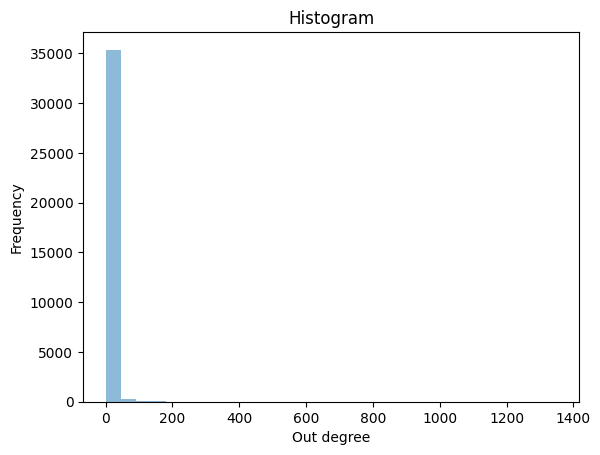

In [38]:
x = list(out_degree_dict.keys())
x.sort()

y=[]

for i in range(len(x)):
    curr = out_degree_dict[x[i]]
    y.append(curr)

plt.hist(x, weights=y, bins=30, alpha=0.5)
plt.title('Histogram')
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.show()

Omitting the first 200 values

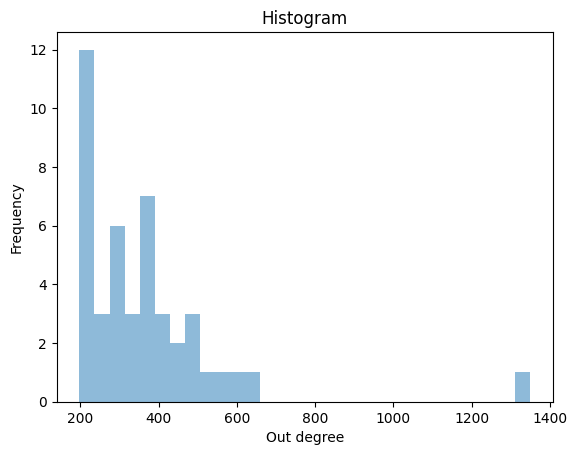

In [39]:
x = x[150:]
y = y[150:]

plt.hist(x, weights=y, bins=30, alpha=0.5)
plt.title('Histogram')
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.show()